In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/daily-gym-tracker/gym.csv


In [2]:
import seaborn as sns
from datetime import datetime, timedelta
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error      
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

In [3]:
df=pd.read_csv("/kaggle/input/daily-gym-tracker/gym.csv")
df.head(7)

,Date,workout,time
0,31-01-2025,walk,1:00:00
1,01-02-2025,walk,1:00:00
2,02-02-2025,walk,1:00:00
3,03-02-2025,Work,0
4,04-02-2025,Slept,0
5,05-02-2025,Holiday,0
6,06-02-2025,Gym,0:55:00


In [4]:
df['time'] = pd.to_timedelta(df['time'])
df['total_seconds'] = df['time'].dt.total_seconds()

In [5]:
df.shape

(24, 4)

In [6]:
df = df.drop_duplicates(subset=["Date"])


In [7]:
df.shape

(21, 4)

In [8]:
df["Date"].nunique()

21

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21 entries, 0 to 23
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype          
---  ------         --------------  -----          
 0   Date           21 non-null     object         
 1   workout        21 non-null     object         
 2   time           21 non-null     timedelta64[ns]
 3   total_seconds  21 non-null     float64        
dtypes: float64(1), object(2), timedelta64[ns](1)
memory usage: 840.0+ bytes


<Axes: xlabel='workout', ylabel='count'>

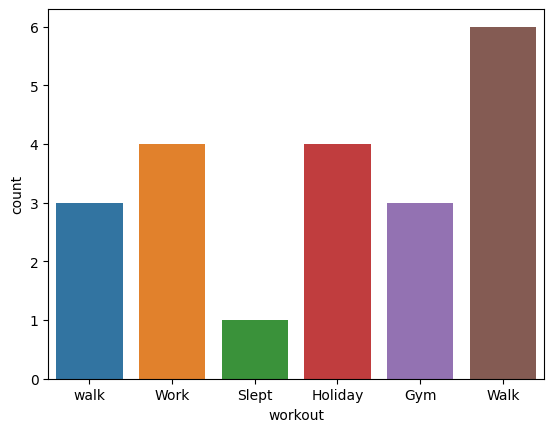

In [10]:
sns.countplot(x="workout",data=df)


<Axes: xlabel='time', ylabel='count'>

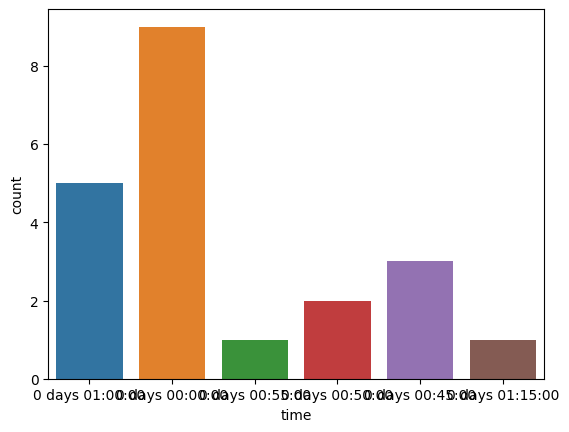

In [11]:
sns.countplot(x="time",data=df)


In [12]:
df=df.drop(["Date","time"],axis=1)

In [13]:
df=pd.get_dummies(df,columns=[ 'workout'],drop_first=True)

<Axes: >

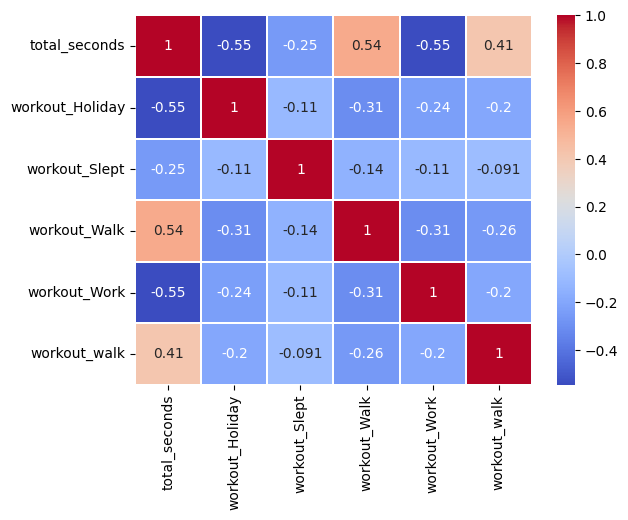

In [14]:
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.1)

In [15]:

df.head()

,total_seconds,workout_Holiday,workout_Slept,workout_Walk,workout_Work,workout_walk
0,3600.0,False,False,False,False,True
1,3600.0,False,False,False,False,True
2,3600.0,False,False,False,False,True
3,0.0,False,False,False,True,False
4,0.0,False,True,False,False,False


In [16]:
x=df.drop(["total_seconds"],axis=1)
y=df["total_seconds"]

In [17]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=26,train_size=0.76)


In [18]:
#if you want make Standart Scaler 

In [19]:
lr=LinearRegression()
lr.fit(x_train,y_train)

predict=lr.predict(x_test)

df=pd.DataFrame({"RealValue":y_test , "Tahmin":predict})
df.head(10)

,RealValue,Tahmin
10,0.0,2.273737e-12
18,3600.0,3.300000e+03
11,2700.0,3.300000e+03
20,0.0,2.273737e-12
15,4500.0,3.300000e+03
17,2700.0,3.300000e+03
